cost function visualization  
최소값을 찾기 위해 W의 최적화 값을 찾으려면,  
그래프 좌측에서는 W+방향, 그래프 우측에서는 W-방향으로 이동해야 함.  
따라서 미분값(기울기값)을 빼주면 최적화값을 향해 나아갈 수 있다.  

alpha(Learning rate)는 0.1정도로 둔다.  

미분함수를 수식화하고 함수를 이용해 코드로 나타낸다.  

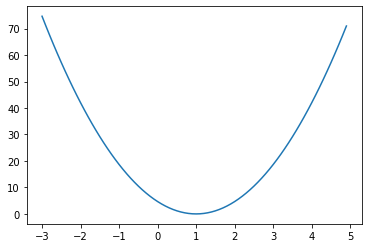

In [1]:
# Lab 3 Minimizing Cost
import tensorflow as tf
import matplotlib.pyplot as plt

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Variables for plotting cost function
W_history = []
cost_history = []

# Launch the graph in a session.
with tf.Session() as sess:
    for i in range(-30, 50):
        curr_W = i * 0.1
        curr_cost = sess.run(cost, feed_dict={W: curr_W})

        W_history.append(curr_W)
        cost_history.append(curr_cost)

# Show the cost function
plt.plot(W_history, cost_history)
plt.show()

---
Gradient Descent algorithm 구현하기

In [ ]:
# Lab 3 Minimizing Cost
import tensorflow as tf

tf.set_random_seed(777)  # for reproducibility

x_data = [1, 2, 3]
y_data = [1, 2, 3]

# Try to find values for W and b to compute y_data = W * x_data
# We know that W should be 1
# But let's use TensorFlow to figure it out
W = tf.Variable(tf.random_normal([1]), name="weight")

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [ ]:
# Minimize: Gradient Descent using derivative: W -= learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

assign 함수를 이용해 업데이트해준다.(Mechanism 3단계)

In [ ]:
# Launch the graph in a session.
with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())

    for step in range(21):
        _, cost_val, W_val = sess.run(
            [update, cost, W], feed_dict={X: x_data, Y: y_data}
        )
        print(step, cost_val, W_val)

---
이 과정은 아래 GradientDescentOptimizer().minimize() 메소드를 쓰는것과 같다.  
코드 줄 수를 줄이고 미분 과정을 생략할 수 있다.  

In [ ]:
# Lab 3 Minimizing Cost
import tensorflow as tf

# tf Graph Input
X = [1, 2, 3]
Y = [1, 2, 3]

# Set wrong model weights #말도 안되는 값 주기
W = tf.Variable(5.0)

# Linear model
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: Gradient Descent Optimizer
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# Launch the graph in a session.
with tf.Session() as sess:
    # Initializes global variables in the graph.
    sess.run(tf.global_variables_initializer())

    for step in range(101):
        _, W_val = sess.run([train, W])
        print(step, W_val)